In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000       # time points
M = 20         # channels
n_trials = 50  # number of trials

# time vector (radian units)
t = np.linspace(0, 6*np.pi, N)

# relationship across channels (imposing covariance)
chan_rel = np.sin(np.linspace(0, 2*np.pi, M));

# Generating data
data = np.zeros((n_trials, M, N))

for n in range(n_trials):
    data_n = np.zeros((M, N))
    data_n[:, :] = np.sin(t)
    data_n = (data_n.T * chan_rel).T
    data_n = data_n + np.random.randn(M, N)
    data[n] = data_n

### Step 1: Compute covariance matrix fo the data

In [3]:
data_ave = np.mean(data, axis=0)

# Covariance for data 1
tmp_data = (data_ave.T - np.mean(data_ave)).T
cov_mat = (tmp_data@tmp_data.T) / (N - 1)

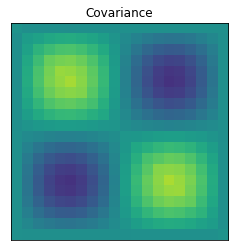

In [4]:
plt.imshow(cov_mat)
plt.title('Covariance')
plt.xticks([])
plt.yticks([])
plt.clim(-.7, .7)

plt.show()

### Step 2: Eigendecomposition of covariance

In [5]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

### Step 3: Sort eigenvectors by eigenvalue magnitude

In [6]:
sorted_idxs = eig_val.argsort()[::-1]
eig_val = eig_val[sorted_idxs]
eig_vec = eig_vec[:, sorted_idxs]

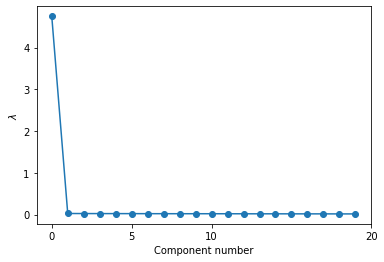

In [7]:
plt.plot(eig_val, marker='o')
plt.ylabel('$\lambda$')
plt.xlabel('Component number')
plt.xticks([0, 5, 10, 20])
plt.show()

### Step 4: Compute component "scores"

In [8]:
time_series = (eig_vec[:, 0:2].T@data)

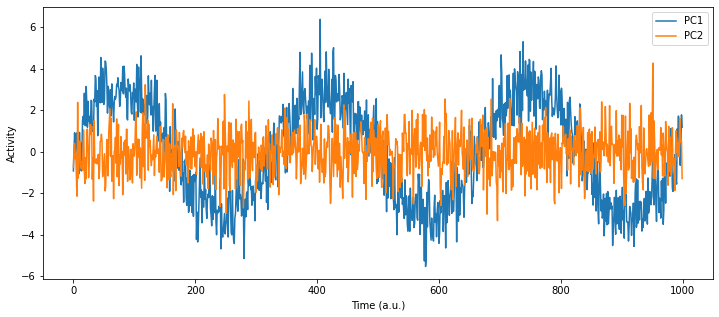

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(time_series[0, 0, :], label='PC1')
plt.plot(time_series[0, 1, :], label='PC2')
plt.legend()
plt.ylabel('Activity')
plt.xlabel('Time (a.u.)')
plt.show()

### Step 5: (optional) Convert eigenvalues to percent variance explained

In [10]:
eig_vals_percent = 100*eig_val/sum(eig_val)
eig_vals_percent

array([92.44105391,  0.51538726,  0.47961929,  0.46540625,  0.45461219,
        0.44642114,  0.42524425,  0.41606691,  0.40516175,  0.40171341,
        0.39684991,  0.38879404,  0.37542961,  0.36449231,  0.36316503,
        0.34765766,  0.34036766,  0.33728991,  0.3213343 ,  0.31393323])

### Step 6: Inspect and interpret eigenvector weights

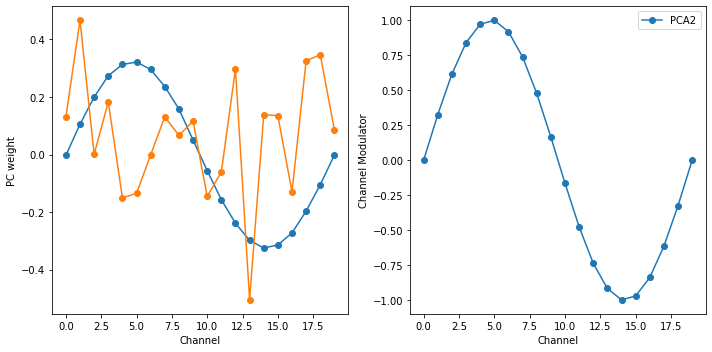

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(eig_vec[:, 0], marker='o', label='PC1')
plt.plot(eig_vec[:, 1], marker='o', label='PCA2')
plt.xlabel('Channel')
plt.ylabel('PC weight')

plt.subplot(1, 2, 2)
plt.plot(chan_rel, marker='o', label='PCA2')
plt.xlabel('Channel')
plt.ylabel('Channel Modulator')
plt.legend()

plt.tight_layout()
plt.show()